In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm

sys.path.append("..")

In [2]:
from manage_data import get_conditions, load_result, delete_all, delete_result

In [3]:
base_conditions = get_conditions(
    N_particle = None,
    N_ensemble = None,
    velocity = None,
    Lambda = None,
    boundary = None,
    N_bins = None,
    gamma = None,
    slope = None,
    temperature = None,
    tau = None,
    Da = None,
    delta_t = None,
    initial = None,
    sampling = None,
)
print(base_conditions)

[]


In [4]:
df = load_result(conditions=base_conditions)
df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,average,std,time
0,a7e396,10000,100,1.0,0.01,5.0,40,1.0,0.46,1.0,1.0,1.0,0.01,10000,10000,0.001684,0.203105,5607.067723
1,35d9c4,10000,100,1.0,0.02,5.0,40,1.0,0.49,1.0,1.0,1.0,0.01,10000,10000,-0.002917,0.309086,4272.436902
2,803550,10000,100,1.0,0.06,5.0,40,1.0,0.37,1.0,1.0,1.0,0.01,10000,10000,-0.002275,0.402026,5313.219726
3,5348c3,10000,100,1.0,0.02,5.0,40,1.0,0.36,1.0,1.0,1.0,0.01,10000,10000,0.003313,0.226717,4233.997573
4,d2675f,10000,100,1.0,0.01,5.0,40,1.0,0.06,1.0,1.0,1.0,0.01,10000,10000,0.000284,0.026701,4403.440623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,e570d6,10000,100,1.0,0.05,5.0,40,1.0,0.44,1.0,1.0,1.0,0.01,10000,10000,-0.009376,0.441392,4224.369339
316,96fd1a,10000,100,1.0,0.03,5.0,40,1.0,0.03,1.0,1.0,1.0,0.01,10000,10000,0.000075,0.023225,4255.177220
317,5aae9a,10000,100,1.0,0.04,5.0,40,1.0,0.19,1.0,1.0,1.0,0.01,10000,10000,-0.000087,0.168260,4236.477144
318,52ce7a,10000,100,1.0,0.01,5.0,40,1.0,0.42,1.0,1.0,1.0,0.01,10000,10000,0.002772,0.188234,5657.768309


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['a7e396', '35d9c4', '803550', '5348c3', 'd2675f', '7f44d2', '1bf8ff', 'd6c04f', '55d5d7', '141eee', 'b1863d', '03373a', '68d2a1', '13274c', '82877c', '42cc9d', 'e03587', '79d4c0', '9edbb2', '0eaa65', '6bd6c5', '830f68', '19f1bb', 'a1b0e1', '127ce4', 'eeb083', 'ad20ea', 'bd1f9b', '3af451', '9aefd6', '81cdfc', 'e3164e', '56af6a', '3bf5fc', '5cc404', '5d2372', '0cf0e5', '38a988', '321cc2', '26cbc4', '6e99cd', 'ece906', 'fc3e53', 'e786f4', '33c37a', '5f7ee6', '81281b', '95a4a7', '24d933', 'd0f60a', '4f51ac', 'c1efee', '2fb655', '1e6328', '20c16f', '5aa953', 'd155e8', 'd3b61e', '32832e', '9111ee', 'da39c3', '62b808', 'ad59f0', 'bc4c55', '964bf5', 'd33907', 'd6b88f', 'ea6ca5', 'c281e4', '5283ba', 'bf1baf', '9a351a', 'df8eaf', 'd7d892', 'e1394a', 'b0c40e', '4bdd8b', 'f1a914', 'ad5e34', '0d0849', '2fdf30', '2f3de2', 'faeb8f', 'a32c77', '5281f3', 'ea63a5', '6cef58', '3f30fa', '0444ac', 'bd3b55', '351d37', '39c40e', 'f6b125', '6bda65', '269fe8', '57a732', '328b99', 'bf0ccf', '04b671', 'f89891',

In [6]:
# delete_all()

In [7]:
x, y = sorted(set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy()))
print(f"{x=}, {y=}")

x=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5], y=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]


In [8]:
data = np.zeros((len(x), len(y)))

for i, slope in enumerate(x):
    for j, Lambda in enumerate(y):
        conditions = get_conditions(slope=slope, Lambda=Lambda)
        value = df.query(" and ".join(conditions))["average"].to_numpy()
        
        if len(value) == 0: continue
        else: data[i,j] = value[0]

data = np.transpose(data)
# print(data)

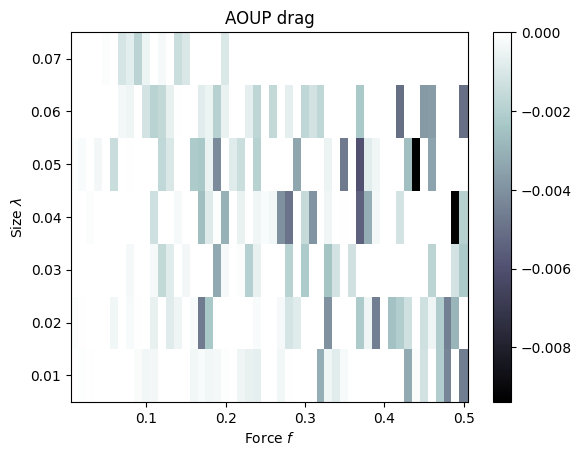

In [9]:
fig, ax = plt.subplots()

c = ax.pcolor(x, y, data, shading='auto',
               norm=Normalize(vmin=data.min(), vmax=0), cmap="bone")

fig.colorbar(c, ax=ax)

ax.set_title("AOUP drag")
ax.set_xlabel(r"Force $f$")
ax.set_ylabel(r"Size $\lambda$")

plt.show()